In [1]:
import gzip
import json
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from notebook_utils import configure_path, setup_matplotlib

In [2]:
configure_path()
setup_matplotlib()

## Venezuela at IXPs

We now turn focus on IXPs, which have reshaped local network domains over the past two decades. IXPs offer interconnection hubs, enabling direct network traffic exchange, reducing dependence on upstream providers, and lowering transit costs. These direct network interconnections shorten path lengths and improve latency, thus enhancing users’ Quality of Experience (QoE). 

While IXPs have flourished globally and in Latin America, remarkably in enabling local traffic exchanges between CDNs and networks, Venezuela remains one of the few countries without any deployed IXP up to 2024. This reflects the concentrated nature of its Internet ecosystem, which is dominated by CANTV and probably unattractive for new participants since the crises unfolded.

Next, we investigate the role of Latin American IXP connectivity in Latin America, considering both domestic and international connections.

We examine the impact of Latin American IXPs on domestic network structures and explore the prevalence of networks from one country traveling to another Latin American country to peer with networks not present domestically.

In [3]:
pdb_filename = "data/raw/10-peeringdb/peeringdb_2_dump_2023_08_06.json.gz"

with gzip.open(pdb_filename, "r") as f:
    pdb = json.load(f)

In [4]:
rir = pd.read_csv("data/external/rir.csv")
ix = pd.DataFrame(pdb["ix"]["data"])
netixlan = pd.DataFrame(pdb["netixlan"]["data"])

In [5]:
ix.tail()

,proto_ipv6,status,url_stats,sales_phone,id,tech_email,city,policy_email,sales_email,tech_phone,...,country,notes,status_dashboard,org_id,social_media,ixf_import_request_status,aka,fac_count,ixf_net_count,name_long
1109,True,ok,https://portal.linx.net,,4231,support@linx.net,Nairobi,,,+442076453535,...,KE,,,791,"[{'identifier': 'https://www.linx.net', 'servi...",queued,,2,0,LINX Nairobi
1110,True,ok,https://stats-ban.ams-ix.net/,,4232,noc@ban.ams-ix.net,Bangkok,info@ams-ix.net,,+6624026706,...,TH,,,21157,"[{'identifier': 'https://ams-ix.net/ban/', 'se...",queued,,1,0,
1111,True,ok,http://giganet.ua/en,+380442013130,4233,noc@giganet.ua,Frankfurt,info@giganet.ua,info@giganet.ua,+380442013136,...,DE,,,7437,"[{'identifier': 'http://giganet.ua/en', 'servi...",queued,,1,0,
1112,True,ok,,,4242,admin@lyyousa.net,San Jose,admin@lyyousa.net,,+15155192199,...,US,,,33460,"[{'identifier': 'https://IX.TimKevin.us/', 'se...",queued,ZeroIX SJC / TOHU IX Zero ver.,3,0,
1113,True,ok,,,4245,noc@bgp.exchange,Lyon,,,,...,FR,,None,27398,"[{'identifier': 'https://bgp.exchange', 'servi...",queued,,0,0,


In [6]:
netixlan.tail()

,ix_id,operational,asn,updated,name,created,speed,notes,ipaddr4,net_id,status,is_rs_peer,ipaddr6,ixlan_id,id
50467,2476,True,140452,2023-08-06T18:00:47Z,JKT-IX: Main,2023-08-06T18:00:47Z,10000,,119.11.185.205,33378,ok,True,None,2476,84817
50468,210,True,140452,2023-08-06T18:01:32Z,IIX-Jakarta,2023-08-06T18:01:32Z,10000,,123.108.9.220,33378,ok,True,None,210,84818
50469,177,True,268988,2023-08-06T18:43:59Z,IX.br (PTT.br) Rio de Janeiro: ATM/MPLA,2023-08-06T18:43:59Z,10000,,45.6.53.231,20052,ok,True,2001:12f8:0:2::53:231,177,84819
50470,4133,True,208753,2023-08-06T21:11:32Z,WSNL-IX,2023-08-06T21:11:32Z,1000,,103.174.246.242,20062,ok,True,2a0e:46c4:1806:2::242,4133,84820
50471,126,True,51847,2023-08-07T00:57:17Z,BBIX Tokyo,2023-08-07T00:57:08Z,100000,,101.203.90.69,21212,ok,True,2001:de8:c::5:1847:1,126,84821


In [7]:
def remove_head(x):
    try:
        return int(x[2:])
    except:
        return -1

In [8]:
eyeballs = pd.read_csv(
    "data/raw/10-apnic-eyeballs/eyeballs_2022_03_22.csv.gz", compression="gzip"
)
eyeballs["asn"] = eyeballs["asn"].map(remove_head)
eyeballs.head()

,rank,asn,asname,cc,users,cc_frac,internet_frac,samples
0,1,4134,"CHINANET-BACKBONE No.31,Jin-rong Street",CN,299752447.0,36.40,7.2355,5227345.0
1,2,55836,RELIANCEJIO-IN Reliance Jio Infocomm Limited,IN,290894460.0,49.94,7.0217,82452995.0
2,3,45609,BHARTI-MOBILITY-AS-AP Bharti Airtel Ltd. AS fo...,IN,148410772.0,25.48,3.5824,42066503.0
3,4,4837,CHINA169-BACKBONE CHINA UNICOM China169 Backbone,CN,145099567.0,17.62,3.5025,2530373.0
4,5,9808,CHINAMOBILE-CN China Mobile Communications Gro...,CN,116650023.0,14.17,2.8157,2034245.0


In [9]:
ixps_lacnic = ix.loc[ix["country"].isin(rir.loc[rir["rir"] == "LACNIC"]["cc"])]["id"]
eyeballs_lacnic = eyeballs.loc[
    eyeballs["cc"].isin(rir.loc[rir["rir"] == "LACNIC"]["cc"])
]["asn"]

In [10]:
ixps_population_lacnic = netixlan.loc[
    netixlan["ix_id"].isin(ixps_lacnic) & netixlan["asn"].isin(eyeballs_lacnic)
][["ix_id", "name", "asn"]]

ixps_population_lacnic = ixps_population_lacnic.join(
    ix[["id", "country"]].set_index(
        [
            "id",
        ]
    ),
    on=[
        "ix_id",
    ],
    how="left",
    lsuffix="_left",
    rsuffix="_right",
)

ixps_population_lacnic = ixps_population_lacnic.join(
    eyeballs.loc[eyeballs["cc"].isin(rir.loc[rir["rir"] == "LACNIC"]["cc"])][
        ["asn", "cc", "cc_frac"]
    ].set_index(
        [
            "asn",
        ]
    ),
    on=[
        "asn",
    ],
    how="right",
    lsuffix="_left",
    rsuffix="_right",
)

ixps_population_lacnic = ixps_population_lacnic.rename(
    columns={
        "country": "ix_cc",
        "cc": "eyeballs_cc",
    }
)

ixps_population_lacnic.head()

,ix_id,name,asn,ix_cc,eyeballs_cc,cc_frac
NaN,NaN,NaN,8151,NaN,MX,34.24
7105.0,3788.0,AR-IX Cabase,7303,AR,AR,35.92
10372.0,3788.0,AR-IX Cabase,7303,AR,AR,35.92
11668.0,708.0,IX.br (PTT.br) Natal: ATM/MPLA,28573,BR,BR,7.68
11669.0,706.0,IX.br (PTT.br) Vitória: ATM/MPLA,28573,BR,BR,7.68


In [11]:
# AS6057 is ANTEL, Uruguay's state owned ISP
ixps_population_lacnic.loc[ixps_population_lacnic["asn"] == 6057]

,ix_id,name,asn,ix_cc,eyeballs_cc,cc_frac
2484.0,3788.0,AR-IX Cabase,6057,AR,UY,92.6
23636.0,171.0,IX.br (PTT.br) São Paulo: ATM/MPLA,6057,BR,UY,92.6
28637.0,1514.0,PIT Santiago - PIT Chile: LAN,6057,CL,UY,92.6
32485.0,119.0,Equinix São Paulo: Equinix IX - SP Metro,6057,BR,UY,92.6
37071.0,177.0,IX.br (PTT.br) Rio de Janeiro: ATM/MPLA,6057,BR,UY,92.6
37309.0,3212.0,Equinix Rio de Janeiro,6057,BR,UY,92.6
38909.0,173.0,IX.br (PTT.br) Porto Alegre: ATM/MPLA,6057,BR,UY,92.6
42134.0,173.0,IX.br (PTT.br) Porto Alegre: ATM/MPLA,6057,BR,UY,92.6
43380.0,1514.0,PIT Santiago - PIT Chile: LAN,6057,CL,UY,92.6
43992.0,1522.0,IXpy: ISPs,6057,PY,UY,92.6


In [12]:
ixps_population_by_cc_lacnic = (
    ixps_population_lacnic.drop_duplicates(["name", "asn"])
    .groupby(["ix_id", "name", "ix_cc", "eyeballs_cc"])["cc_frac"]
    .sum()
    .reset_index()
)

In [13]:
ixps_population_by_cc_lacnic.head()

,ix_id,name,ix_cc,eyeballs_cc,cc_frac
0,119.0,Equinix São Paulo: Equinix IX - SP Metro,BR,AR,0.19
1,119.0,Equinix São Paulo: Equinix IX - SP Metro,BR,BR,3.96
2,119.0,Equinix São Paulo: Equinix IX - SP Metro,BR,CL,0.22
3,119.0,Equinix São Paulo: Equinix IX - SP Metro,BR,CO,3.21
4,119.0,Equinix São Paulo: Equinix IX - SP Metro,BR,MX,0.11


In [14]:
_p = ixps_population_by_cc_lacnic.loc[ixps_population_by_cc_lacnic["ix_cc"] != "US"]

_p = ixps_population_by_cc_lacnic.loc[
    ixps_population_by_cc_lacnic["ix_id"].isin(_p["ix_id"])
]
_p = _p.sort_values(["ix_cc", "eyeballs_cc"])

In [15]:
# Venezuela is notably absent from our heatmap, with a single network peering at Equinix Bogota in Colombia, which holds only 4% of Venezuela’s Internet population.
ixps_population_lacnic.loc[
    (ixps_population_lacnic["ix_cc"] == "CO")
    & (ixps_population_lacnic["eyeballs_cc"] == "VE")
]

,ix_id,name,asn,ix_cc,eyeballs_cc,cc_frac
43352.0,2289.0,Equinix Bogota: Equinix IX - BG Metro,61461,CO,VE,4.07


In [16]:
_p = (
    ixps_population_by_cc_lacnic.loc[
        ixps_population_by_cc_lacnic["ix_cc"]
        == ixps_population_by_cc_lacnic["eyeballs_cc"]
    ]
    .groupby("ix_cc")["cc_frac"]
    .max()
    .reset_index()
)

_p = _p.join(
    ixps_population_by_cc_lacnic.set_index(["ix_cc", "cc_frac"]),
    on=["ix_cc", "cc_frac"],
    how="left",
    lsuffix="_left",
    rsuffix="_right",
)

_p = ixps_population_by_cc_lacnic.loc[
    ixps_population_by_cc_lacnic["ix_id"].isin(_p["ix_id"])
]
_p = _p.sort_values(["ix_cc", "eyeballs_cc"])

In [17]:
def naming(x):
    name_dict = {
        "IXpy: ISPs": "IXpy",
        "AR-IX Cabase": "AR-IX",
        "IX.br (PTT.br) São Paulo: ATM/MPLA": "IX.br (SP)",
        "PIT Santiago - PIT Chile: LAN": "PIT Chile (SCL)",
        "PIT Bolivia": "PIT.BO",
        "Peru IX (PIT Peru sac) - Lima: Main": "Peru IX",
        "NAP Colombia: Main": "NAP.CO",
        "CRIX: Peering LAN": "CRIX",
        "InteRed Panama": "InteRed (PA)",
        "AMS-IX Caribbean": "AMS-IX (CW)",
    }

    if x in name_dict.keys():
        return name_dict[x]

    return x

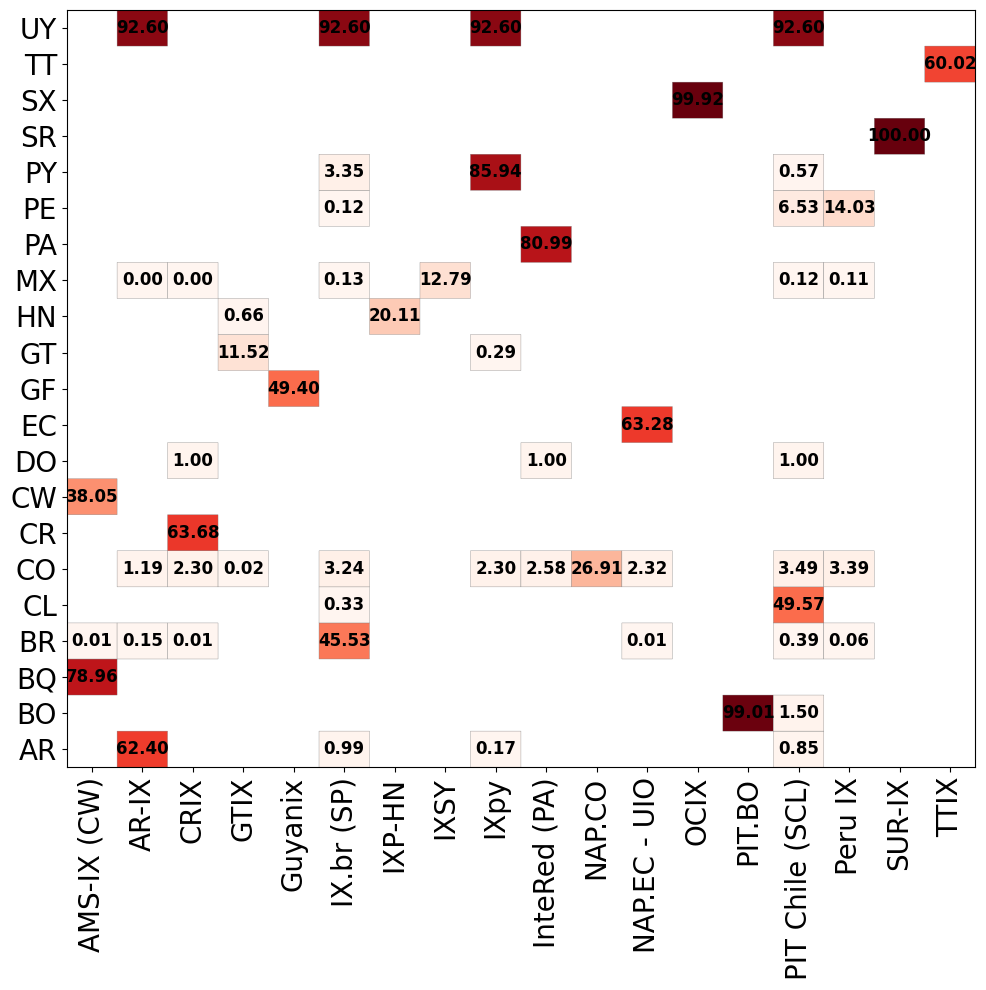

In [18]:
fig, ax = plt.subplots(1, figsize=(10, 10))

p = _p.pivot(index="eyeballs_cc", columns="name")["cc_frac"]
t = p.columns
idx = p.index
p = p.to_numpy()

heatmap = ax.pcolor(
    p,
    norm=colors.Normalize(vmin=0, vmax=100),
    cmap="Reds",
    edgecolors="grey",
)

for i in range(p.shape[1]):
    for j in range(p.shape[0]):

        if not np.isnan(p[j][i]):
            ax.annotate(
                f"{p[j][i]:.2f}",
                xy=(i + 0.5, j + 0.5),
                va="center",
                ha="center",
                weight="bold",
                fontsize=12,
            )

ax.set_yticks(np.arange(len(idx)) + 0.5)
ax.set_yticklabels(fontsize=20, labels=idx)

ax.set_xticks(np.arange(len(t)) + 0.5)
ax.set_xticklabels(fontsize=20, labels=[naming(i) for i in t], rotation=90)

fig.subplots_adjust(hspace=0)
fig.tight_layout()
fig.savefig(f"figures/10-ixps.pdf")

The figure shows a heatmap of the largest IXP in each country based on the domestic Internet population and the Internet population in Latin American countries served by the networks peering at these points.

The region has a wide variety of IXPs in terms of origin (e.g., state-sponsored in Bolivia), nature (e.g., federal networks of IXPs in Brazil and Argentina), and size (ranging from very few networks in Trinidad and Tobago to up to 2,000 in Sao Paulo). Several countries present success stories in keeping local traffic local, exemplified by Argentina, Brazil, and Chile. Notably, AR-IX (formerly known as CABASE) in Buenos Aires, IX.br (formerly known as Punto do Troca do Trafego, PTT) in Sao Paulo, and PIT Chile in Santiago connect networks with 62.4%, 45.53%, and 49.57% of the countries’ Internet populations, respectively.

However, some countries, such as Uruguay and Venezuela, where state-owned Internet providers hold a significant footprint, have not seen the establishment of any IXPs. This might be attributed to the dominant size of the incumbent, leaving little room for the peering needs of the rest of the market or a neutral peering space to peer with CDNs. However, the figure reveals that Uruguay has a notable international presence in Argentina (AR-IX), Brazil (IX.br), Paraguay (IX.py), and Chile (PIT Chile).

Similarly, despite the absence of local IXPs, Venezuela’s network could be at other prominent Latin American IXPs, such as IX.br Sao Paulo or the nearby AMS-IX exchange in Curacao, located only 295 km from Caracas. However, our analysis reveals that Venezuela is notably absent from our heatmap, with a single network peering at Equinix Bogota in Colombia, which holds only 4% of Venezuela’s Internet population.

## Including the US

While establishing a presence in major regional IXPs within the LACNIC region, such as IX.br Sao Paulo or AR-IX Buenos Aires, can be appealing for networks in Latin American countries, establishing a presence in the United States emerges as an alternative, particularly for those countries geographically closer to Miami than Sao Paulo. Venezuela is within this latter group and Venezuelan networks might have had a presence in the US prior to escalating. tensions between the two nations. Next, we analyze the eyeball population in networks connected to exchange points in the United States, comparing Venezuela with the rest of the region.

In [19]:
ixps_lacnic = ix.loc[ix["country"].isin(rir.loc[rir["rir"] == "LACNIC"]["cc"])]["id"]
ixps_lacnic = ix.loc[
    ix["country"].isin(np.append(rir.loc[rir["rir"] == "LACNIC"]["cc"].values, "US"))
]["id"]

In [20]:
ixps_population_lacnic = netixlan.loc[
    netixlan["ix_id"].isin(ixps_lacnic) & netixlan["asn"].isin(eyeballs_lacnic)
][["ix_id", "name", "asn"]]

ixps_population_lacnic = ixps_population_lacnic.join(
    ix[["id", "country"]].set_index(
        [
            "id",
        ]
    ),
    on=[
        "ix_id",
    ],
    how="left",
    lsuffix="_left",
    rsuffix="_right",
)

ixps_population_lacnic = ixps_population_lacnic.join(
    eyeballs.loc[eyeballs["cc"].isin(rir.loc[rir["rir"] == "LACNIC"]["cc"])][
        ["asn", "cc", "cc_frac"]
    ].set_index(
        [
            "asn",
        ]
    ),
    on=[
        "asn",
    ],
    how="right",
    lsuffix="_left",
    rsuffix="_right",
)

ixps_population_lacnic = ixps_population_lacnic.rename(
    columns={
        "country": "ix_cc",
        "cc": "eyeballs_cc",
    }
)

ixps_population_lacnic.head()

,ix_id,name,asn,ix_cc,eyeballs_cc,cc_frac
NaN,NaN,NaN,8151,NaN,MX,34.24
7105.0,3788.0,AR-IX Cabase,7303,AR,AR,35.92
10372.0,3788.0,AR-IX Cabase,7303,AR,AR,35.92
11668.0,708.0,IX.br (PTT.br) Natal: ATM/MPLA,28573,BR,BR,7.68
11669.0,706.0,IX.br (PTT.br) Vitória: ATM/MPLA,28573,BR,BR,7.68


In [21]:
ixps_population_by_cc_lacnic = (
    ixps_population_lacnic.drop_duplicates(["name", "asn"])
    .groupby(["ix_id", "name", "ix_cc", "eyeballs_cc"])["cc_frac"]
    .sum()
    .reset_index()
)

In [22]:
ixps_ascnt_by_cc_lacnic = (
    ixps_population_lacnic.drop_duplicates(["name", "asn"])
    .groupby(["ix_id", "name", "ix_cc", "eyeballs_cc"])["cc_frac"]
    .count()
    .reset_index()
)

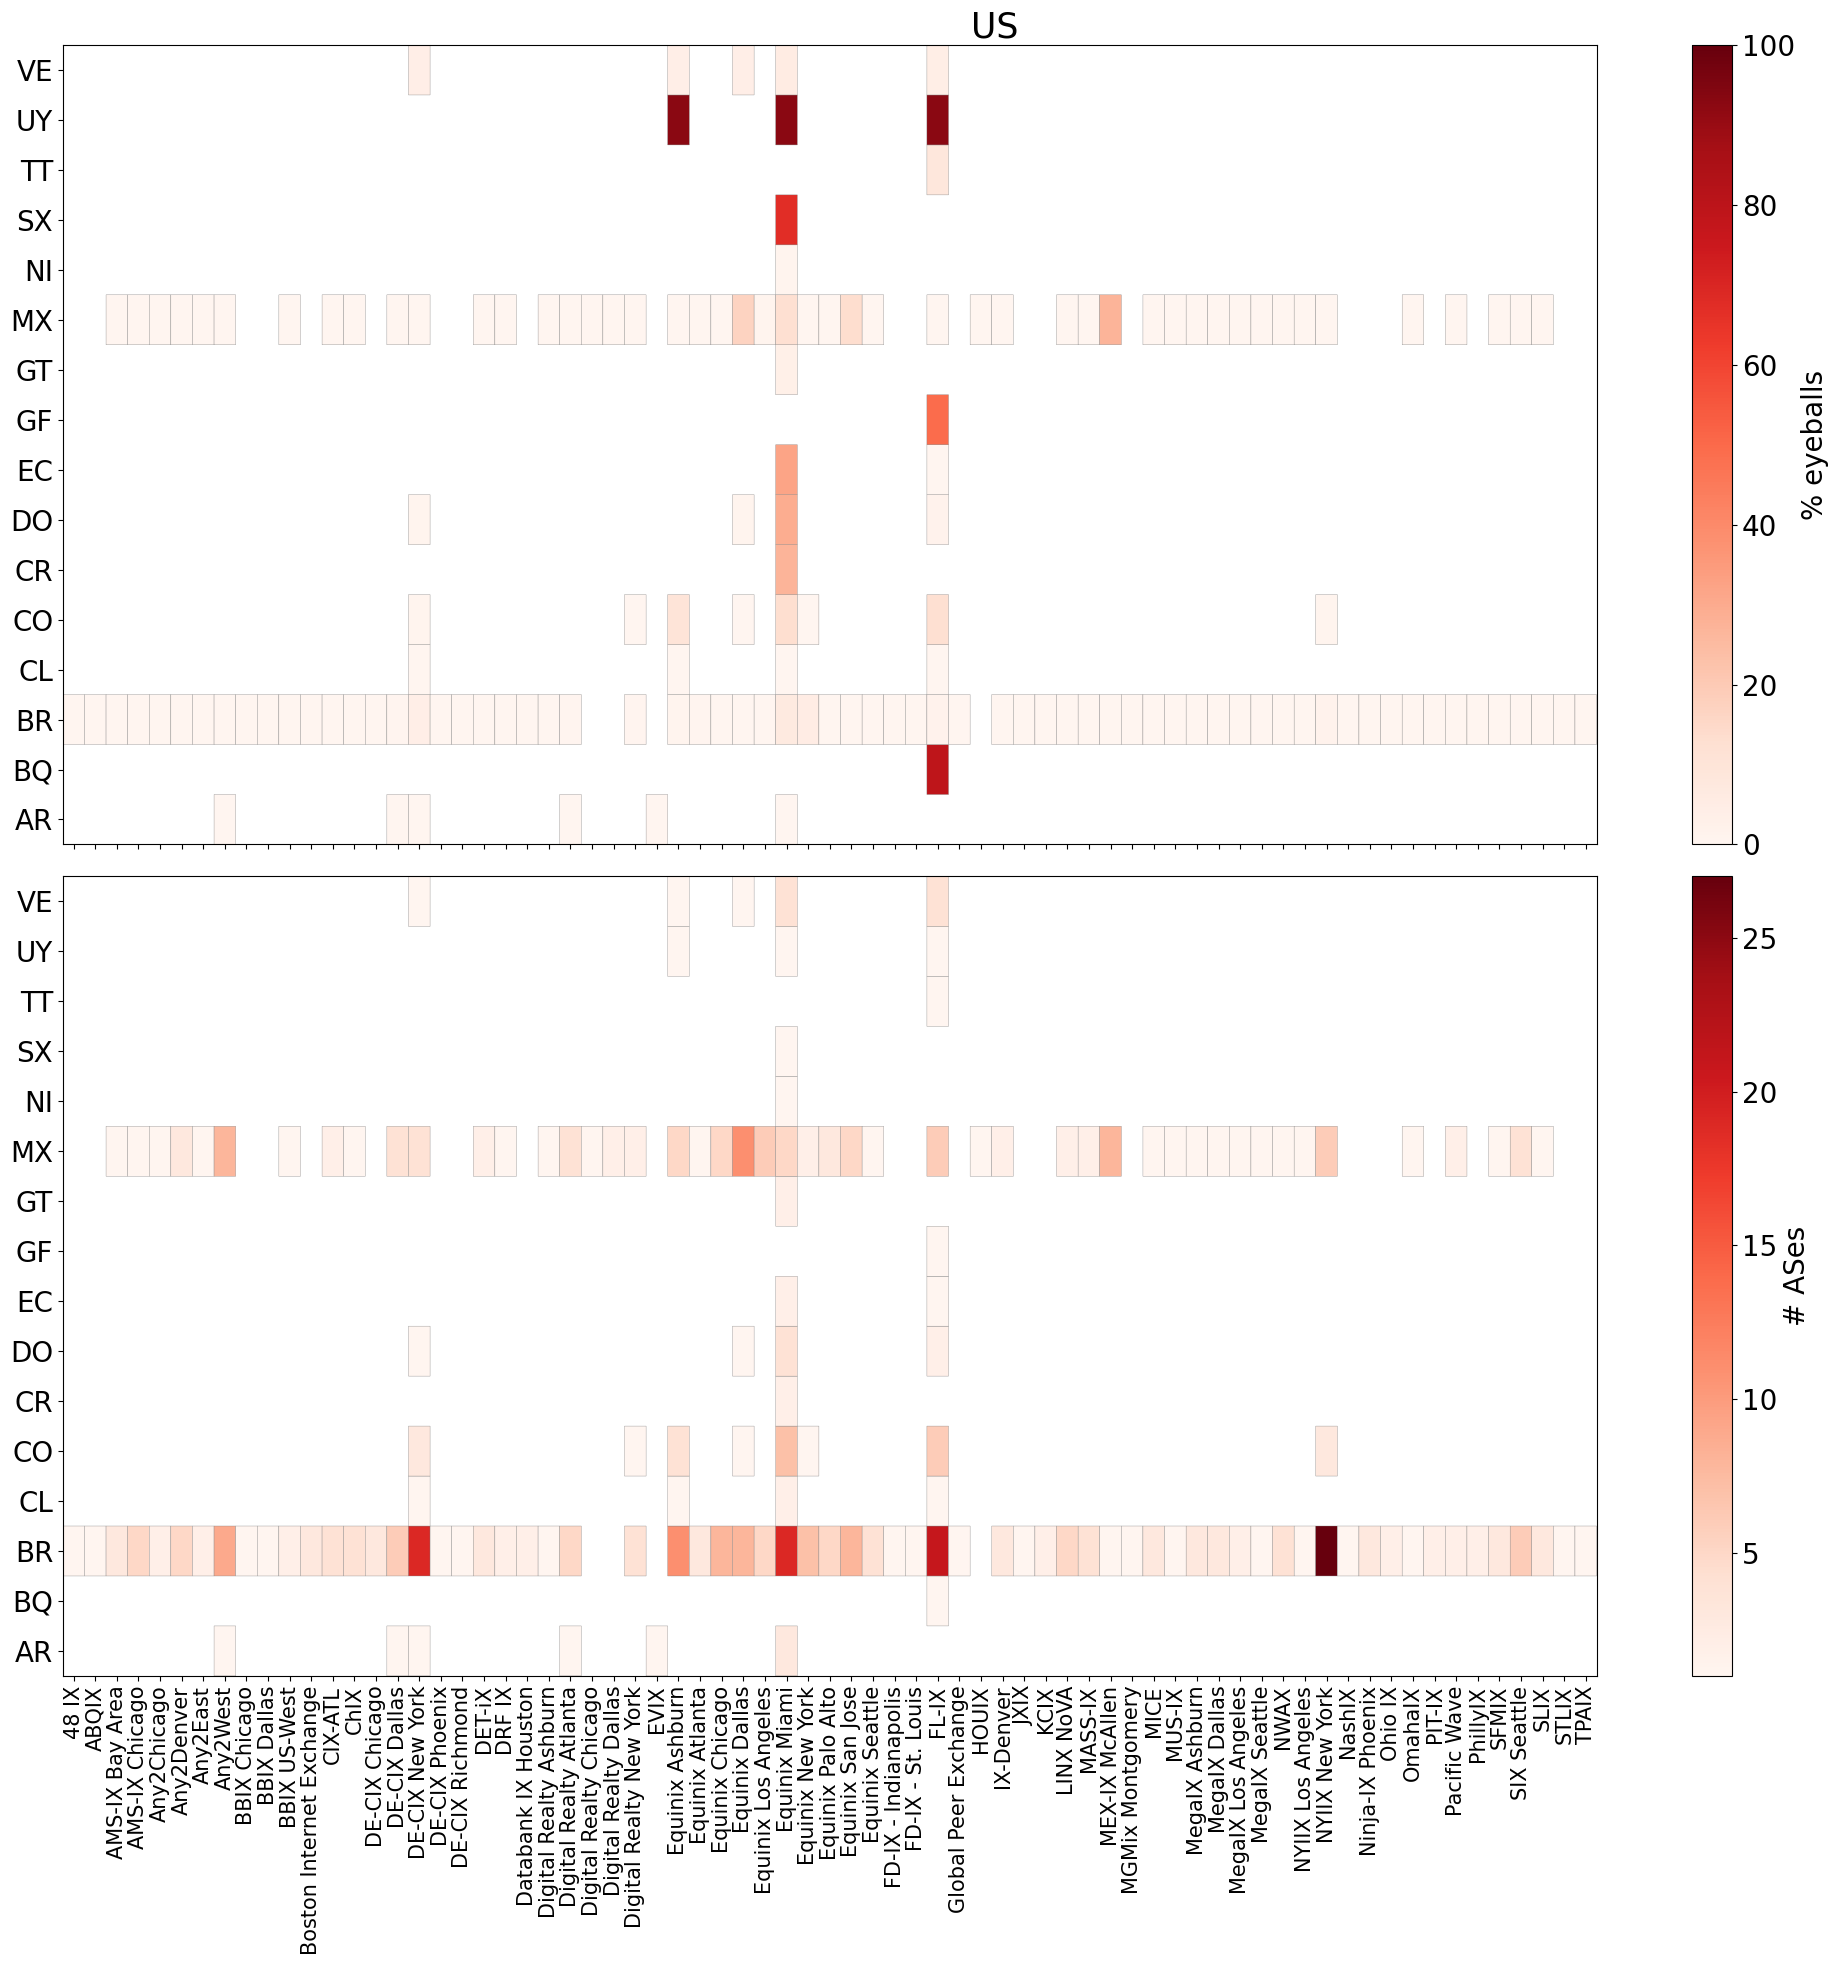

In [23]:
for ix_cc in [
    "US",
]:
    fig, [ax1, ax2] = plt.subplots(2, figsize=(20, 20), sharex=True)

    _p = ixps_population_by_cc_lacnic.loc[
        ixps_population_by_cc_lacnic["ix_cc"] == ix_cc
    ]

    p = _p.pivot(index="eyeballs_cc", columns="name")["cc_frac"]
    t = p.columns
    idx = p.index
    p = p.to_numpy()

    heatmap = ax1.pcolor(
        p,
        norm=colors.Normalize(vmin=0, vmax=100),
        cmap="Reds",
        edgecolors="grey",
    )

    cbar = fig.colorbar(heatmap, ax=ax1)
    cbar.ax.tick_params(labelsize=20)
    cbar.ax.set_ylabel("% eyeballs", fontsize=20)

    ax1.set_yticks(np.arange(len(idx)) + 0.5)
    ax1.set_yticklabels(fontsize=20, labels=idx)

    ax1.set_xticks(np.arange(len(t)) + 0.5)
    ax1.set_xticklabels(
        fontsize=15,
        labels=[i.split(":")[0] if i.split("-")[0] != "SLIX " else "SLIX" for i in t],
        rotation=90,
    )

    #
    _p = ixps_ascnt_by_cc_lacnic.loc[ixps_ascnt_by_cc_lacnic["ix_cc"] == ix_cc]

    p = _p.pivot(index="eyeballs_cc", columns="name")["cc_frac"]
    t = p.columns
    idx = p.index
    p = p.to_numpy()

    heatmap = ax2.pcolor(
        p,
        norm=colors.Normalize(vmin=_p["cc_frac"].min(), vmax=_p["cc_frac"].max()),
        cmap="Reds",
        edgecolors="grey",
    )

    cbar = fig.colorbar(heatmap, ax=ax2)
    cbar.ax.tick_params(labelsize=20)
    cbar.ax.set_ylabel("# ASes", fontsize=20)

    ax2.set_yticks(np.arange(len(idx)) + 0.5)
    ax2.set_yticklabels(fontsize=20, labels=idx)

    ax2.set_xticks(np.arange(len(t)) + 0.5)
    ax2.set_xticklabels(
        fontsize=15,
        labels=[i.split(":")[0] if i.split("-")[0] != "SLIX " else "SLIX" for i in t],
        rotation=90,
    )

    fig.suptitle(ix_cc, fontsize=25)
    fig.subplots_adjust(hspace=0)
    fig.tight_layout()
    fig.savefig(f"figures/21-ixps_{ix_cc}.pdf")

The figure presents a heatmap showing the presence of Latin American networks at IXPs in the United States. The top panel of the figure shows the proportion of the Internet population in Latin American countries served by networks peering at these US IXPs, while the lower panel displays the number of Autonomous Systems (ASes) from each country present at these points. 

Our analysis indicates that, in general, IXPs in the US are not popular destinations for Latin American networks, with the exceptions being FL-IX, Equinix Miami, and DECIX New York. This trend differs for networks serving Brazilian and Mexican internet populations, which are present across most US exchanges. 

In contrast to Brazilian and Mexican networks, Uruguayan networks prefer establishing a presence at a few exchanges (Equinix Ashburn, Miami, and FL-IX), but connecting to a significant portion of the country’s internet population. In the case of Venezuela, the presence of its network peering in the US is minimal, with just seven networks serving a mere 7% of Venezuela’s Internet population.


In [24]:
_p

,ix_id,name,ix_cc,eyeballs_cc,cc_frac
0,1.0,Equinix Ashburn,US,BR,11
1,1.0,Equinix Ashburn,US,CL,1
2,1.0,Equinix Ashburn,US,CO,4
3,1.0,Equinix Ashburn,US,MX,5
4,1.0,Equinix Ashburn,US,UY,1
...,...,...,...,...,...
269,3187.0,BBIX Chicago,US,BR,1
279,3322.0,ABQIX,US,BR,1
281,3378.0,DE-CIX Chicago,US,BR,3
284,3476.0,Global Peer Exchange,US,BR,1


In [25]:
ixps_population_lacnic.loc[
    (ixps_population_lacnic["ix_cc"] == "US")
    & (ixps_population_lacnic["eyeballs_cc"] == "VE")
]

,ix_id,name,asn,ix_cc,eyeballs_cc,cc_frac
5051.0,1.0,Equinix Ashburn,61461,US,VE,4.07
31807.0,17.0,Equinix Miami,61461,US,VE,4.07
31811.0,954.0,FL-IX,61461,US,VE,4.07
39486.0,3.0,Equinix Dallas,61461,US,VE,4.07
45041.0,804.0,DE-CIX New York: DE-CIX New York Peering LAN,61461,US,VE,4.07
41581.0,17.0,Equinix Miami,269832,US,VE,1.31
49999.0,954.0,FL-IX,267809,US,VE,0.29
50440.0,17.0,Equinix Miami,267809,US,VE,0.29
10704.0,3.0,Equinix Dallas,28007,US,VE,0.22
16684.0,954.0,FL-IX,28007,US,VE,0.22


In [26]:
ixps_population_lacnic.loc[
    (ixps_population_lacnic["ix_cc"] == "US")
    & (ixps_population_lacnic["eyeballs_cc"] == "VE")
].drop_duplicates("asn").shape[0]

7

In [27]:
ixps_population_lacnic.loc[
    (ixps_population_lacnic["ix_cc"] == "US")
    & (ixps_population_lacnic["eyeballs_cc"] == "VE")
].drop_duplicates("asn")["cc_frac"].sum()

6.13